# Logistic egression

In [114]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data=pd.read_csv("titanic.csv")
titanic_data.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


In [59]:
print("the number of passengers are", len(titanic_data.index))

the number of passengers are 1309


## Analyzing data

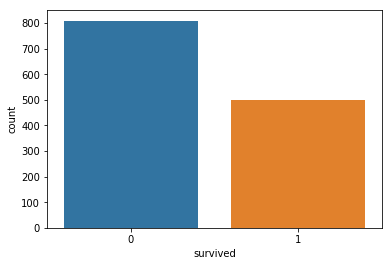

In [60]:
sns.countplot(x="survived",data=titanic_data)

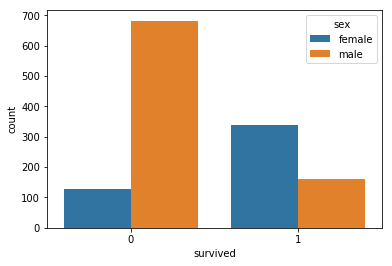

In [61]:
sns.countplot(x="survived",hue='sex',data=titanic_data)

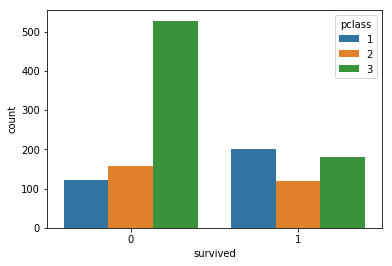

In [62]:
sns.countplot(x="survived",hue='pclass',data=titanic_data)

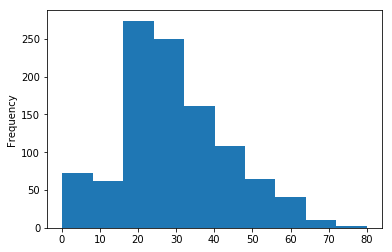

In [63]:
titanic_data['age'].plot.hist()

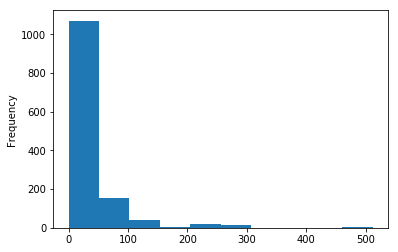

In [64]:
titanic_data['fare'].plot.hist()

In [65]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


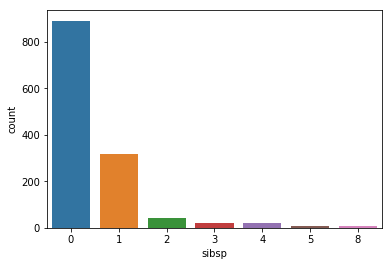

In [66]:
sns.countplot(x='sibsp',data=titanic_data)

## Data Wrangling (Data Cleaning)

In [67]:
titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

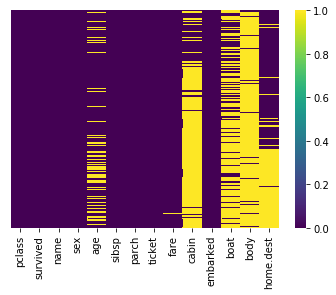

In [68]:
sns.heatmap(titanic_data.isnull(), yticklabels=False,cmap='viridis')

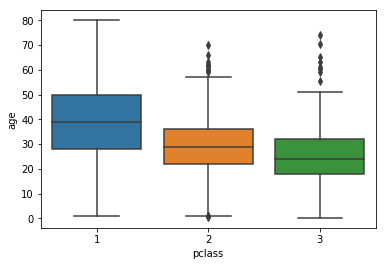

In [69]:
sns.boxplot(x='pclass',y='age',data=titanic_data)

In [70]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [71]:
titanic_data.drop("cabin",axis=1,inplace=True)
titanic_data.drop("boat",axis=1,inplace=True)
titanic_data.drop("body",axis=1,inplace=True)
titanic_data.drop("home.dest",axis=1,inplace=True)

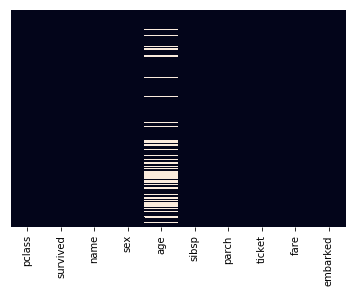

In [72]:
sns.heatmap(titanic_data.isnull(), yticklabels=False,cbar=False)

In [75]:
titanic_data.dropna(inplace=True)

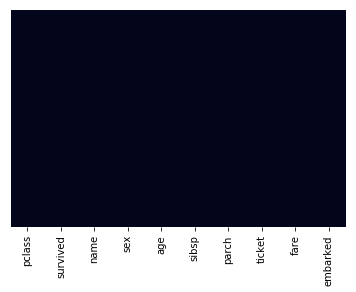

In [76]:
sns.heatmap(titanic_data.isnull(), yticklabels=False,cbar=False)

In [83]:
pd.get_dummies(titanic_data['sex'],drop_first=True).head()

,male
0,0
1,1
2,0
3,1
4,0


In [87]:
embark=pd.get_dummies(titanic_data['embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [89]:
pcl=pd.get_dummies(titanic_data['pclass'],drop_first=True)
pcl.head()

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [92]:
titanic_data=pd.concat([titanic_data,embark,pcl],axis=1)
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Q,S,2,3
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,0,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0,1,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,1,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,1,0,0


In [94]:
titanic_data.drop(['sex','embarked','name','ticket','pclass'],axis=1,inplace=True)
titanic_data.head()

,survived,age,sibsp,parch,fare,Q,S,2,3
0,1,29.0000,0,0,211.3375,0,1,0,0
1,1,0.9167,1,2,151.5500,0,1,0,0
2,0,2.0000,1,2,151.5500,0,1,0,0
3,0,30.0000,1,2,151.5500,0,1,0,0
4,0,25.0000,1,2,151.5500,0,1,0,0


## Train Data

In [96]:
x=titanic_data.drop("survived",axis=1)
y=titanic_data['survived']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [109]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [110]:
prediction=logmodel.predict(X_test)

In [111]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.68      0.86      0.76       177\n           1       0.73      0.49      0.58       136\n\n   micro avg       0.70      0.70      0.70       313\n   macro avg       0.70      0.67      0.67       313\nweighted avg       0.70      0.70      0.68       313\n'

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[152,  25],
       [ 70,  66]], dtype=int64)

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.6964856230031949